In [1]:
%matplotlib notebook
%load_ext autoreload
%pwd

'/ocean/projects/asc170022p/mtragoza/lung-project/notebooks'

In [2]:
%time
import sys, os
os.environ['PKG_CONFIG_PATH'] = '/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/pkgconfig'

sys.path.append('..')
import project

CPU times: user 1 μs, sys: 1e+03 ns, total: 2 μs
Wall time: 8.11 μs


In [3]:
# configuration settings
data_root = '../data/phantom_disk_500'
mesh_radius = 10
interp_radius = 10
interp_sigma = 5
num_levels = 3
num_conv_layers = 2
conv_channels = 4
conv_kernel_size = 3
output_func = 'relu'
batch_size = 2
learning_rate = 1e-5

save_every = 10
save_prefix = '2024-10-22__disk'
#save_prefix = f'2024-09-30__initial/train__batch_size__{mesh_radius}__{interp_radius}__{interp_sigma}__{output_func}__{batch_size}/'
load_epoch = 0

In [4]:
%autoreload
phantom_set = project.phantom.PhantomSet(data_root, num_phantoms=100)

Loading ../data/phantom_disk_500/phantom4/phantom4_anat.nii.gz
Loading ../data/phantom_disk_500/phantom4/phantom4_elast.nii.gz
Loading ../data/phantom_disk_500/phantom4/phantom4_disp.nii.gz
Loading ../data/phantom_disk_500/phantom4/phantom4_mask.nii.gz
CT


<IPython.core.display.Javascript object>


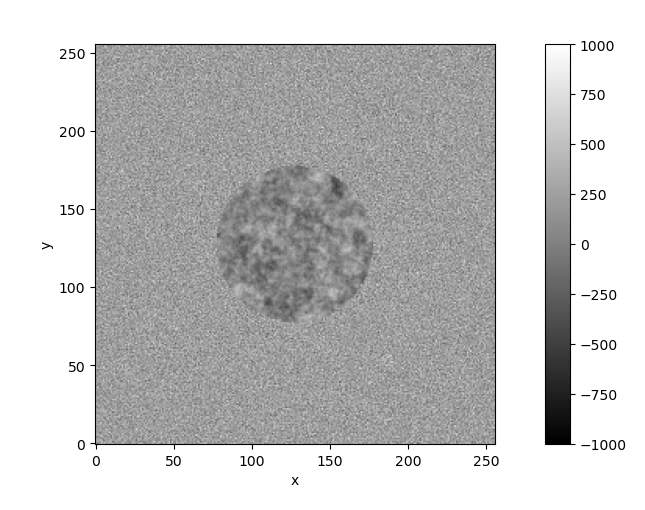

interactive(children=(SelectionSlider(description='z', options=((0.0, 0), (2.0, 1), (4.0, 2), (6.0, 3), (8.0, …

elasticity


<IPython.core.display.Javascript object>


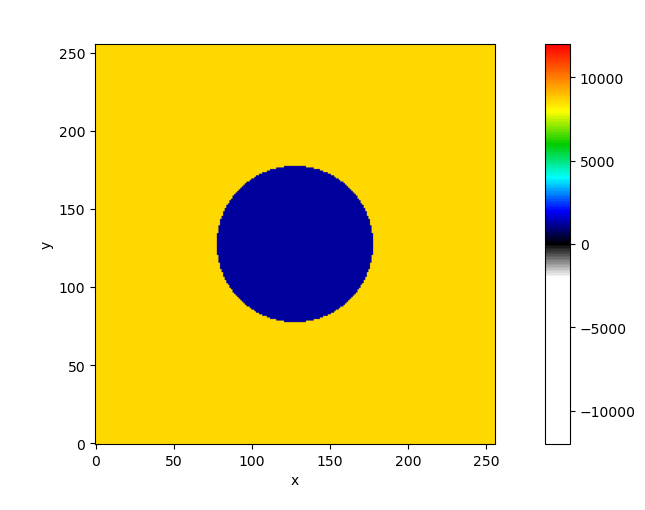

interactive(children=(SelectionSlider(description='z', options=((0.0, 0), (2.0, 1), (4.0, 2), (6.0, 3), (8.0, …

displacement


<IPython.core.display.Javascript object>


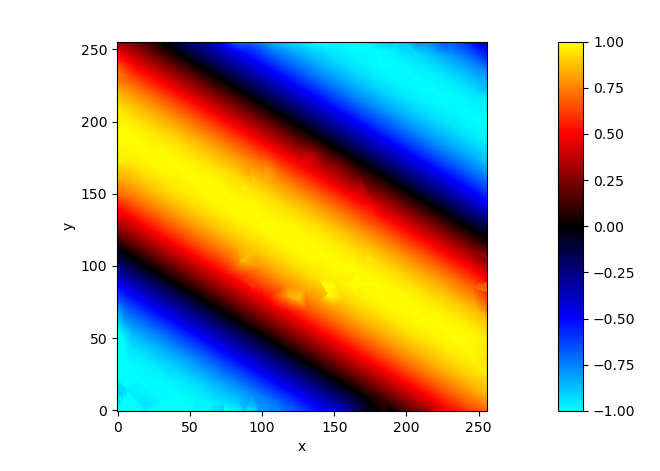

interactive(children=(SelectionSlider(description='z', options=((0.0, 0), (2.0, 1), (4.0, 2), (6.0, 3), (8.0, …

In [5]:
phantom = phantom_set[4]
phantom.load_niftis()
project.visual.XArrayViewer(phantom.anat)
project.visual.XArrayViewer(phantom.elast)
project.visual.XArrayViewer(phantom.disp)

In [6]:
all_examples = phantom_set.get_examples(mesh_radius)
train_examples = all_examples[10:]
test_examples = all_examples[:10]
len(train_examples), len(test_examples)

(90, 10)

In [7]:
all_examples[0]

{'name': 'phantom0',
 'anat_file': PosixPath('../data/phantom_disk_500/phantom0/phantom0_anat.nii.gz'),
 'elast_file': PosixPath('../data/phantom_disk_500/phantom0/phantom0_elast.nii.gz'),
 'disp_file': PosixPath('../data/phantom_disk_500/phantom0/phantom0_disp.nii.gz'),
 'mask_file': PosixPath('../data/phantom_disk_500/phantom0/phantom0_mask.nii.gz'),
 'mesh_file': PosixPath('../data/phantom_disk_500/phantom0/phantom0_mesh10.xdmf'),
 'mesh_radius': 10}

In [8]:
train_data = project.data.Dataset(train_examples)
test_data = project.data.Dataset(test_examples)

In [9]:
model = project.model.UNet3D(
    in_channels=1,
    out_channels=1,
    num_levels=num_levels,
    num_conv_layers=num_conv_layers,
    conv_channels=conv_channels,
    conv_kernel_size=conv_kernel_size,
).cuda()

In [13]:
%autoreload
trainer = project.training.Trainer(
    model=model,
    train_data=train_data,
    test_data=test_data,
    batch_size=batch_size,
    learning_rate=learning_rate,
    interp_radius=interp_radius,
    interp_sigma=interp_sigma,
    save_every=save_every,
    save_prefix=save_prefix,
    sync_cuda=True
)

In [14]:
if load_epoch:
    trainer.load_state(epoch=load_epoch)

Loading ../data/phantom_disk_500/phantom5/phantom5_anat.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom5/phantom5_disp.nii.gz... (256, 256, 64, 3)
Loading ../data/phantom_disk_500/phantom5/phantom5_mask.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom5/phantom5_mesh10.xdmf... 6831
Loading ../data/phantom_disk_500/phantom5/phantom5_elast.nii.gz... (256, 256, 64)
['phantom5'].

<IPython.core.display.Javascript object>


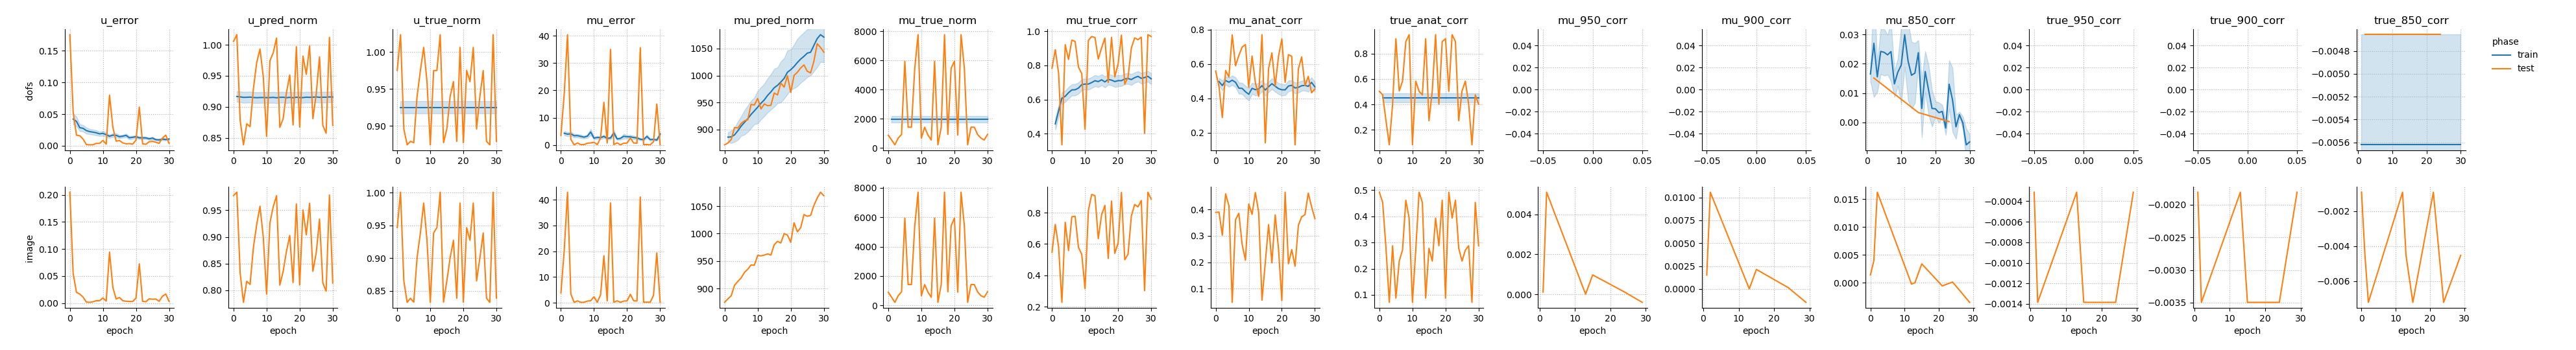

anat


<IPython.core.display.Javascript object>


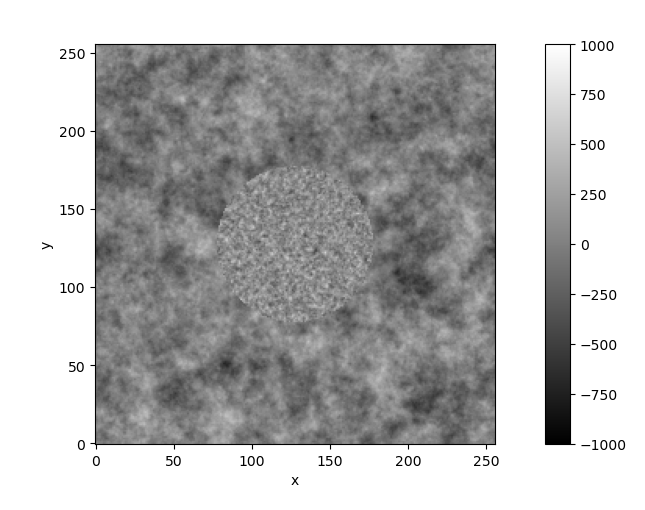

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

emph


<IPython.core.display.Javascript object>


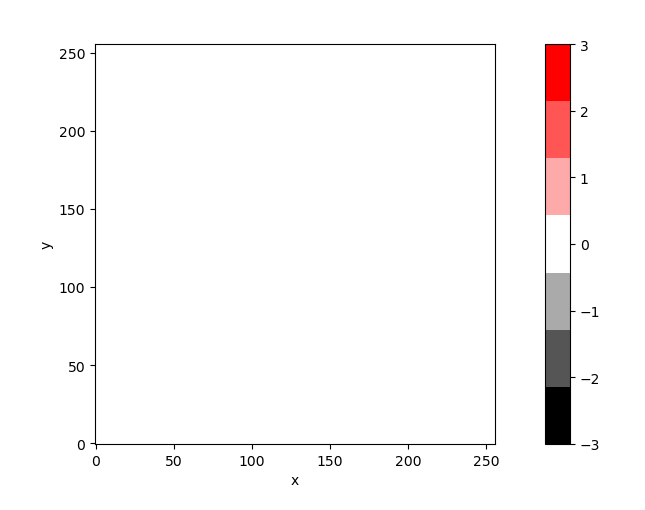

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

mu_pred


<IPython.core.display.Javascript object>


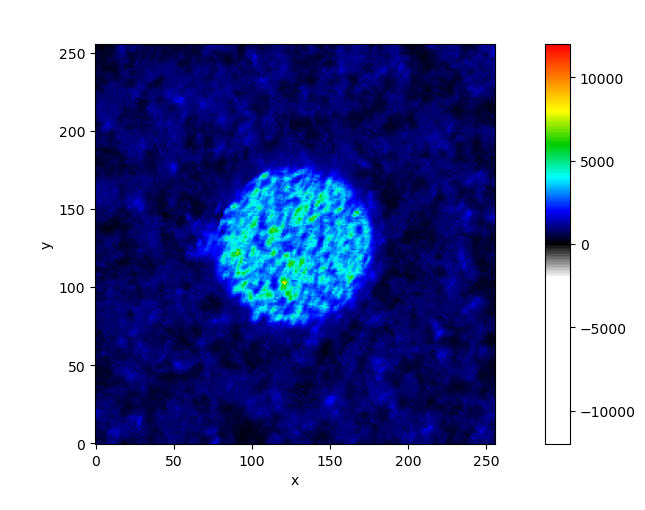

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

mu_true


<IPython.core.display.Javascript object>


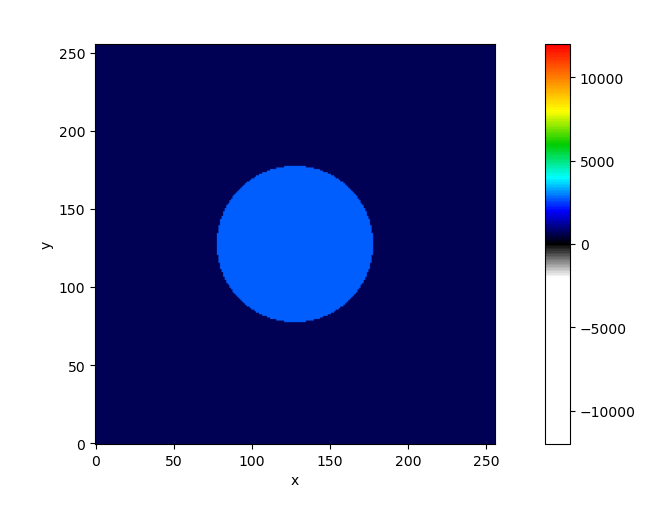

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

u_pred


<IPython.core.display.Javascript object>


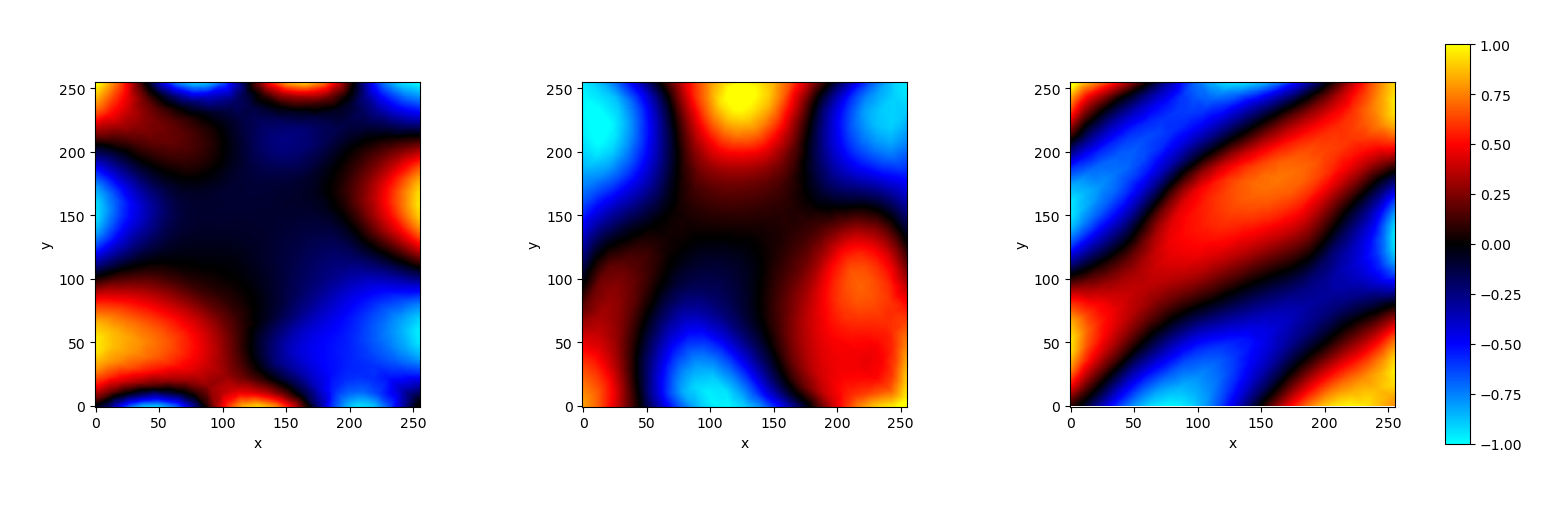

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

u_true


<IPython.core.display.Javascript object>


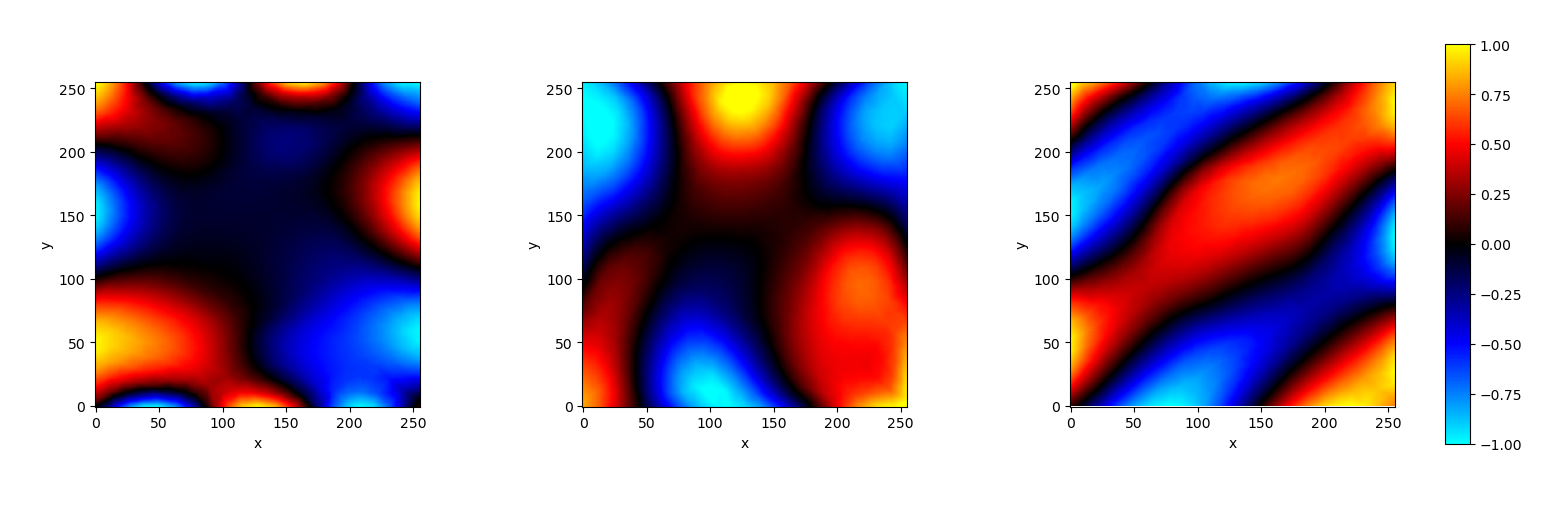

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

0.1753
CPU times: user 48.2 s, sys: 877 ms, total: 49.1 s
Wall time: 44.9 s


In [15]:
%%time
# test forward pass and initialize viewers
trainer.timer.start()
trainer.run_next_batch(phase='test', epoch=0)

In [16]:
trainer.save_metrics()
trainer.save_viewers()
trainer.save_state()

In [ ]:
%%time
trainer.timer.start()
trainer.train(num_epochs=250)

Training...
Epoch 1/250
Running train phase
Loading ../data/phantom_disk_500/phantom88/phantom88_anat.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom88/phantom88_disp.nii.gz... (256, 256, 64, 3)
Loading ../data/phantom_disk_500/phantom88/phantom88_mask.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom88/phantom88_mesh10.xdmf... 6831
Loading ../data/phantom_disk_500/phantom88/phantom88_elast.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom32/phantom32_anat.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom32/phantom32_disp.nii.gz... (256, 256, 64, 3)
Loading ../data/phantom_disk_500/phantom32/phantom32_mask.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom32/phantom32_mesh10.xdmf... 6831
Loading ../data/phantom_disk_500/phantom32/phantom32_elast.nii.gz... (256, 256, 64)
['phantom88', 'phantom32']..0.0102
Loading ../data/phantom_disk_500/phantom89/phantom89_anat.nii.gz... (256, 256, 64)
Loading ../data/phan

Loading ../data/phantom_disk_500/phantom51/phantom51_elast.nii.gz... (256, 256, 64)
['phantom70', 'phantom51']..0.0177
Loading ../data/phantom_disk_500/phantom83/phantom83_anat.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom83/phantom83_disp.nii.gz... (256, 256, 64, 3)
Loading ../data/phantom_disk_500/phantom83/phantom83_mask.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom83/phantom83_mesh10.xdmf... 6831
Loading ../data/phantom_disk_500/phantom83/phantom83_elast.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom45/phantom45_anat.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom45/phantom45_disp.nii.gz... (256, 256, 64, 3)
Loading ../data/phantom_disk_500/phantom45/phantom45_mask.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom45/phantom45_mesh10.xdmf... 6831
Loading ../data/phantom_disk_500/phantom45/phantom45_elast.nii.gz... (256, 256, 64)
['phantom83', 'phantom45']..0.0201
Loading ../data/phantom_disk

Loading ../data/phantom_disk_500/phantom34/phantom34_mesh10.xdmf... 6831
Loading ../data/phantom_disk_500/phantom34/phantom34_elast.nii.gz... (256, 256, 64)
['phantom80', 'phantom34']..0.1749
Loading ../data/phantom_disk_500/phantom17/phantom17_anat.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom17/phantom17_disp.nii.gz... (256, 256, 64, 3)
Loading ../data/phantom_disk_500/phantom17/phantom17_mask.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom17/phantom17_mesh10.xdmf... 6831
Loading ../data/phantom_disk_500/phantom17/phantom17_elast.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom11/phantom11_anat.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom11/phantom11_disp.nii.gz... (256, 256, 64, 3)
Loading ../data/phantom_disk_500/phantom11/phantom11_mask.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom11/phantom11_mesh10.xdmf... 6831
Loading ../data/phantom_disk_500/phantom11/phantom11_elast.nii.gz... (256,

Loading ../data/phantom_disk_500/phantom90/phantom90_elast.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom93/phantom93_anat.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom93/phantom93_disp.nii.gz... (256, 256, 64, 3)
Loading ../data/phantom_disk_500/phantom93/phantom93_mask.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom93/phantom93_mesh10.xdmf... 6831
Loading ../data/phantom_disk_500/phantom93/phantom93_elast.nii.gz... (256, 256, 64)
['phantom90', 'phantom93']..0.0020
Loading ../data/phantom_disk_500/phantom48/phantom48_anat.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom48/phantom48_disp.nii.gz... (256, 256, 64, 3)
Loading ../data/phantom_disk_500/phantom48/phantom48_mask.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom48/phantom48_mesh10.xdmf... 6831
Loading ../data/phantom_disk_500/phantom48/phantom48_elast.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom10/phantom10_anat.nii.g

['phantom59', 'phantom77']..0.0132
Loading ../data/phantom_disk_500/phantom66/phantom66_anat.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom66/phantom66_disp.nii.gz... (256, 256, 64, 3)
Loading ../data/phantom_disk_500/phantom66/phantom66_mask.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom66/phantom66_mesh10.xdmf... 6831
Loading ../data/phantom_disk_500/phantom66/phantom66_elast.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom38/phantom38_anat.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom38/phantom38_disp.nii.gz... (256, 256, 64, 3)
Loading ../data/phantom_disk_500/phantom38/phantom38_mask.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom38/phantom38_mesh10.xdmf... 6831
Loading ../data/phantom_disk_500/phantom38/phantom38_elast.nii.gz... (256, 256, 64)
['phantom66', 'phantom38']..0.0740
Loading ../data/phantom_disk_500/phantom43/phantom43_anat.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_

['phantom83', 'phantom68']..0.0086
['phantom71', 'phantom43']..0.0426
['phantom57', 'phantom84']..0.0089
['phantom76', 'phantom81']..0.1011
['phantom91', 'phantom21']..0.0124
['phantom44', 'phantom27']..0.0326
['phantom40', 'phantom59']..0.0118
['phantom30', 'phantom64']..0.0088
['phantom97', 'phantom24']..0.0027
['phantom38', 'phantom28']..0.0533
['phantom32', 'phantom35']..0.0057
['phantom99', 'phantom94']..0.0051
['phantom17', 'phantom89']..0.0064
['phantom29', 'phantom45']..0.0133
['phantom23', 'phantom66']..0.0058
['phantom73', 'phantom26']..0.0013
['phantom13', 'phantom85']..0.0066
['phantom54', 'phantom48']..0.0163
['phantom52', 'phantom20']..0.0373
['phantom67', 'phantom50']..0.0206
['phantom31', 'phantom93']..0.0322
['phantom37', 'phantom69']..0.0256
['phantom95', 'phantom78']..0.0078
['phantom19', 'phantom22']..0.0146
['phantom79', 'phantom36']..0.0017
['phantom39', 'phantom75']..0.0086
['phantom10', 'phantom80']..0.0096
['phantom34', 'phantom14']..0.1384
['phantom65', 'phant

['phantom79', 'phantom40']..0.0039
['phantom80', 'phantom46']..0.0021
['phantom84', 'phantom98']..0.0099
['phantom51', 'phantom11']..0.0185
['phantom91', 'phantom73']..0.0112
['phantom27', 'phantom18']..0.0045
['phantom14', 'phantom48']..0.0234
['phantom61', 'phantom78']..0.0152
['phantom32', 'phantom25']..0.0033
['phantom90', 'phantom39']..0.0049
['phantom10', 'phantom47']..0.0659
['phantom26', 'phantom17']..0.0035
['phantom81', 'phantom54']..0.0051
['phantom19', 'phantom76']..0.0985
['phantom96', 'phantom37']..0.0595
Loading ../data/phantom_disk_500/phantom3/phantom3_anat.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom3/phantom3_disp.nii.gz... (256, 256, 64, 3)
Loading ../data/phantom_disk_500/phantom3/phantom3_mask.nii.gz... (256, 256, 64)
Loading ../data/phantom_disk_500/phantom3/phantom3_mesh10.xdmf... 6831
Loading ../data/phantom_disk_500/phantom3/phantom3_elast.nii.gz... (256, 256, 64)
['phantom3'].0.0016
Epoch 8/250
Running train phase
['phantom97', 'phantom39

['phantom56', 'phantom82']..0.0854
['phantom3'].0.0025
Epoch 12/250
Running train phase
['phantom25', 'phantom62']..0.0142
['phantom58', 'phantom85']..0.0037
['phantom47', 'phantom66']..0.0454
['phantom65', 'phantom35']..0.0025
['phantom73', 'phantom68']..0.0043
['phantom18', 'phantom37']..0.0042
['phantom87', 'phantom41']..0.0052
['phantom33', 'phantom43']..0.0153
['phantom98', 'phantom80']..0.0020
['phantom71', 'phantom93']..0.0047
['phantom55', 'phantom46']..0.0222
['phantom78', 'phantom48']..0.0185
['phantom10', 'phantom19']..0.0202
['phantom92', 'phantom57']..0.0026
['phantom88', 'phantom95']..0.0057
['phantom29', 'phantom36']..0.0016
['phantom40', 'phantom12']..0.0177
['phantom59', 'phantom44']..0.0056
['phantom79', 'phantom70']..0.0008
['phantom21', 'phantom38']..0.0351
['phantom49', 'phantom96']..0.0158
['phantom17', 'phantom16']..0.0032
['phantom69', 'phantom63']..0.0026
['phantom39', 'phantom64']..0.0043
['phantom15', 'phantom56']..0.0131
['phantom67', 'phantom42']..0.0577
['

Epoch 17/250
Running train phase
['phantom80', 'phantom83']..0.0023
['phantom36', 'phantom75']..0.0026
['phantom54', 'phantom21']..0.0134
['phantom53', 'phantom91']..0.0055
['phantom76', 'phantom13']..0.0559
['phantom18', 'phantom37']..0.0036
['phantom35', 'phantom79']..0.0054
['phantom72', 'phantom88']..0.0223
['phantom97', 'phantom48']..0.0173
['phantom99', 'phantom61']..0.0014
['phantom43', 'phantom29']..0.0436
['phantom74', 'phantom10']..0.0327
['phantom28', 'phantom93']..0.0141
['phantom52', 'phantom11']..0.0272
['phantom98', 'phantom24']..0.0040
['phantom14', 'phantom32']..0.0162
['phantom73', 'phantom85']..0.0034
['phantom23', 'phantom90']..0.0047
['phantom33', 'phantom39']..0.0038
['phantom31', 'phantom96']..0.0453
['phantom77', 'phantom89']..0.0025
['phantom58', 'phantom84']..0.0071
['phantom42', 'phantom71']..0.0480
['phantom25', 'phantom78']..0.0075
['phantom16', 'phantom60']..0.0038
['phantom15', 'phantom47']..0.0612
['phantom95', 'phantom55']..0.0230
['phantom38', 'phantom

['phantom25', 'phantom14']..0.0131
['phantom68', 'phantom45']..0.0076
['phantom15', 'phantom48']..0.0231
['phantom98', 'phantom66']..0.0027
['phantom90', 'phantom86']..0.0405
['phantom57', 'phantom17']..0.0080
['phantom12', 'phantom20']..0.0162
['phantom74', 'phantom36']..0.0124
['phantom39', 'phantom62']..0.0090
['phantom22', 'phantom82']..0.0056
['phantom77', 'phantom69']..0.0057
['phantom87', 'phantom21']..0.0065
['phantom29', 'phantom30']..0.0012
['phantom23', 'phantom13']..0.0031
['phantom91', 'phantom83']..0.0055
['phantom58', 'phantom71']..0.0089
['phantom94', 'phantom63']..0.0021
['phantom76', 'phantom78']..0.0542
['phantom55', 'phantom95']..0.0213
['phantom53', 'phantom85']..0.0017
['phantom46', 'phantom59']..0.0013
['phantom54', 'phantom24']..0.0019
['phantom41', 'phantom97']..0.0042
['phantom27', 'phantom70']..0.0107
['phantom43', 'phantom33']..0.0089
['phantom10', 'phantom81']..0.0029
['phantom34', 'phantom96']..0.0823
['phantom16', 'phantom44']..0.0055
['phantom40', 'phant

['phantom99', 'phantom98']..0.0104
['phantom47', 'phantom25']..0.0433
['phantom83', 'phantom96']..0.0129
['phantom18', 'phantom33']..0.0028
['phantom34', 'phantom28']..0.0288
['phantom58', 'phantom84']..0.0065
['phantom51', 'phantom32']..0.0045
['phantom77', 'phantom40']..0.0047
['phantom55', 'phantom54']..0.0117
['phantom35', 'phantom21']..0.0056
['phantom61', 'phantom92']..0.0045
['phantom44', 'phantom30']..0.0020
['phantom60', 'phantom97']..0.0036
['phantom27', 'phantom50']..0.0037
['phantom11', 'phantom52']..0.0226
['phantom72', 'phantom10']..0.0466
['phantom90', 'phantom81']..0.0108
['phantom14', 'phantom91']..0.0064
['phantom20', 'phantom87']..0.0037
['phantom13', 'phantom95']..0.0062
['phantom94', 'phantom59']..0.0013
['phantom71', 'phantom63']..0.0027
['phantom67', 'phantom62']..0.0109
['phantom17', 'phantom46']..0.0017
['phantom38', 'phantom82']..0.0295
['phantom45', 'phantom31']..0.0275
['phantom26', 'phantom48']..0.0050
['phantom76', 'phantom64']..0.0108
['phantom53', 'phant

In [ ]:
trainer.evaluator.metrics

In [ ]:
trainer.timer.usage

In [ ]:
trainer.timer.usage.groupby(['phase', 'event']).mean().sort_values('time')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(trainer.timer.usage, y='event', x='time', hue='phase', estimator='mean', ax=ax)
ax.set_xlabel('time (s)')
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(trainer.timer.usage , y='event', x='time', hue='phase', estimator='sum', ax=ax)
#ax.set_xscale('log')
ax.set_xlabel('time (s)')
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(trainer.timer.usage, y='time', x='phase', estimator='mean', ax=ax)
ax.set_ylabel('time (s)')
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(trainer.timer.usage, y='time', x='phase', estimator='sum', ax=ax)
ax.set_ylabel('time (s)')
fig.tight_layout()

In [ ]:
test_data[0][-5].mean()